# Flow Lenia [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxencefaldor/cax/blob/main/examples/21_flow_lenia.ipynb)

## Installation

You will need Python 3.10 or later, and a working JAX installation. For example, you can install JAX with:

In [ ]:
%pip install -U "jax[cuda12]"

Then, install CAX from PyPi:

In [ ]:
%pip install -U "cax[examples]"

## Import

In [1]:
import pickle

import jax
import jax.numpy as jnp
import mediapy
from cax.models.flow_lenia import (
	FlowLenia,
	FreeKernelParams,
	GrowthParams,
	OriginalKernelParams,
	RuleParams,
)
from flax import nnx

## Configuration

In [2]:
seed = 0

num_dims = 2
state_size = 128
channel_size = 3

R = 12
T = 10

state_scale = 1

key = jax.random.key(seed)
rngs = nnx.Rngs(seed)

## Init state

In [3]:
def init_state(pattern):
	pattern = jnp.transpose(pattern, axes=(1, 2, 0))

	mid = state_size // 2

	# Scale cells
	scaled_cells = pattern.repeat(state_scale, axis=-3).repeat(state_scale, axis=-2)
	cx, cy = scaled_cells.shape[0], scaled_cells.shape[1]

	# Create empty state and place cells
	state = jnp.zeros((state_size, state_size, channel_size))
	state = state.at[mid - cx // 2 : mid + cx - cx // 2, mid - cy // 2 : mid + cy - cy // 2, :].set(
		scaled_cells
	)
	return state

## Model

This section demonstrates how to visualize well-known Lenia creatures by loading rule parameters and patterns from `cax/models/lenia/assets`.

You can run either the VT049W or 5N7KKM section below. You can also experiment with combining rule parameters from one soliton with the pattern of another to observe novel emergent behaviors.

### VT049W

In [4]:
# Load rule params for soliton VT049W
with open("../cax/models/lenia/assets/VT049W/rule_params.pickle", "rb") as f:
	rule_params = pickle.load(f)

In [5]:
# Load pattern for soliton VT049W
with open("../cax/models/lenia/assets/VT049W/Aquarium.pickle", "rb") as f:
	pattern = pickle.load(f)

### 5N7KKM

In [6]:
# Rule params
with open("../cax/models/lenia/assets/5N7KKM/rule_params.pickle", "rb") as f:
	rule_params = pickle.load(f)

In [7]:
# Pattern
with open("../cax/models/lenia/assets/5N7KKM/Aquarium_swarm_twin.pickle", "rb") as f:
	pattern = pickle.load(f)

In [8]:
ca = FlowLenia(
	num_dims=num_dims,
	channel_size=channel_size,
	R=R,
	T=T,
	rule_params=rule_params,
	state_size=state_size,
	state_scale=state_scale,
)

## Visualize

In [ ]:
state = init_state(pattern)

states = ca(state, num_steps=256, all_steps=True)

""

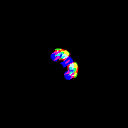

In [10]:
states = jnp.concatenate([state[None], states])
frames = jax.vmap(ca.render)(states)

mediapy.show_video(frames, width=256, height=256, codec="gif")

## Orbium

In [11]:
num_dims = 2
state_size = 128
channel_size = 1

R = 12
T = 10

state_scale = 2

### Kernel

In [12]:
kernel_params = OriginalKernelParams(
	r=jnp.array(1.0, jnp.float32),
	b=jnp.array([1.0]),
)

### Growth Mapping Function

In [13]:
growth_params = GrowthParams(
	mean=jnp.array(0.15, jnp.float32),
	std=jnp.array(0.015, jnp.float32),
)

### Rule Params

In [14]:
rule_params = RuleParams(
	channel_source=jnp.array(0, jnp.int32),
	channel_target=jnp.array(0, jnp.int32),
	weight=jnp.array(1.0, jnp.float32),
	kernel_params=kernel_params,
	growth_params=growth_params,
)
rule_params = jax.tree.map(lambda x: x[None], rule_params)

### Model

In [15]:
ca = FlowLenia(
	num_dims=num_dims,
	channel_size=channel_size,
	R=R,
	T=T,
	state_size=state_size,
	state_scale=state_scale,
	rule_params=rule_params,
)

### Visualize

In [16]:
# fmt: off
orbium = jnp.array(
	[
		[
		[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.14, 0.1, 0.0, 0.0, 0.03, 0.03, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.0, 0.08, 0.24, 0.3, 0.3, 0.18, 0.14, 0.15, 0.16, 0.15, 0.09, 0.2, 0.0, 0.0, 0.0, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.34, 0.44, 0.46, 0.38, 0.18, 0.14, 0.11, 0.13, 0.19, 0.18, 0.45, 0.0, 0.0, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.06, 0.13, 0.39, 0.5, 0.5, 0.37, 0.06, 0.0, 0.0, 0.0, 0.02, 0.16, 0.68, 0.0, 0.0, 0.0],
		[0.0, 0.0, 0.0, 0.11, 0.17, 0.17, 0.33, 0.4, 0.38, 0.28, 0.14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.42, 0.0, 0.0],
		[0.0, 0.0, 0.09, 0.18, 0.13, 0.06, 0.08, 0.26, 0.32, 0.32, 0.27, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.82, 0.0, 0.0],
		[0.27, 0.0, 0.16, 0.12, 0.0, 0.0, 0.0, 0.25, 0.38, 0.44, 0.45, 0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22, 0.17, 0.0],
		[0.0, 0.07, 0.2, 0.02, 0.0, 0.0, 0.0, 0.31, 0.48, 0.57, 0.6, 0.57, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.49, 0.0],
		[0.0, 0.59, 0.19, 0.0, 0.0, 0.0, 0.0, 0.2, 0.57, 0.69, 0.76, 0.76, 0.49, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36, 0.0],
		[0.0, 0.58, 0.19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.67, 0.83, 0.9, 0.92, 0.87, 0.12, 0.0, 0.0, 0.0, 0.0, 0.22, 0.07],
		[0.0, 0.0, 0.46, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.93, 1.0, 1.0, 1.0, 0.61, 0.0, 0.0, 0.0, 0.0, 0.18, 0.11],
		[0.0, 0.0, 0.82, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47, 1.0, 1.0, 0.98, 1.0, 0.96, 0.27, 0.0, 0.0, 0.0, 0.19, 0.1],
		[0.0, 0.0, 0.46, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 1.0, 1.0, 0.84, 0.92, 0.97, 0.54, 0.14, 0.04, 0.1, 0.21, 0.05],
		[0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.09, 0.8, 1.0, 0.82, 0.8, 0.85, 0.63, 0.31, 0.18, 0.19, 0.2, 0.01],
		[0.0, 0.0, 0.0, 0.36, 0.1, 0.0, 0.0, 0.0, 0.05, 0.54, 0.86, 0.79, 0.74, 0.72, 0.6, 0.39, 0.28, 0.24, 0.13, 0.0],
		[0.0, 0.0, 0.0, 0.01, 0.3, 0.07, 0.0, 0.0, 0.08, 0.36, 0.64, 0.7, 0.64, 0.6, 0.51, 0.39, 0.29, 0.19, 0.04, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.1, 0.24, 0.14, 0.1, 0.15, 0.29, 0.45, 0.53, 0.52, 0.46, 0.4, 0.31, 0.21, 0.08, 0.0, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.0, 0.08, 0.21, 0.21, 0.22, 0.29, 0.36, 0.39, 0.37, 0.33, 0.26, 0.18, 0.09, 0.0, 0.0, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.13, 0.19, 0.22, 0.24, 0.24, 0.23, 0.18, 0.13, 0.05, 0.0, 0.0, 0.0, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.06, 0.08, 0.09, 0.07, 0.05, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]
		]
	]
)

In [17]:
state = init_state(orbium)

states = ca(state, num_steps=256, all_steps=True)

In [18]:
states = jnp.concatenate([state[None], states])
frames = jax.vmap(ca.render)(states)

mediapy.show_video(frames, width=256, height=256)

## Sampling Rules

### Configuration

In [19]:
num_dims = 2
state_size = 128
channel_size = 1

R = 20
T = 10

num_rules = 10

state_scale = 1

### Define sampling distribution

In [20]:
def sample_kernel_params(key: jax.Array, k: int = 3):
	"""Sample kernel parameters according to a specific distribution."""
	key_r, key_b, key_a, key_w = jax.random.split(key, 4)
	r = jax.random.uniform(key_r, minval=0.2, maxval=1.0)
	b = jax.random.uniform(key_b, shape=(k,), minval=0.001, maxval=1.0)
	a = jax.random.uniform(key_a, shape=(k,), minval=0.0, maxval=1.0)
	w = jax.random.uniform(key_w, shape=(k,), minval=0.01, maxval=0.5)
	return FreeKernelParams(r=r, b=b, a=a, w=w)


def sample_growth_params(key: jax.Array):
	"""Sample growth parameters according to a specific distribution."""
	key_mean, key_std = jax.random.split(key)
	mean = jax.random.uniform(key_mean, minval=0.05, maxval=0.5)
	std = jax.random.uniform(key_std, minval=0.001, maxval=0.18)
	return GrowthParams(mean=mean, std=std)


def sample_rule_params(key: jax.Array, k: int = 3):
	"""Sample rule parameters according to a specific distribution."""
	key_channel_source, key_channel_target, key_weight, key_kernel_params, key_growth_params = (
		jax.random.split(key, 5)
	)

	# Sample channel source and target
	channel_source = jax.random.randint(key_channel_source, (), minval=0, maxval=channel_size)
	channel_target = jax.random.randint(key_channel_target, (), minval=0, maxval=channel_size)

	# Sample weight
	weight = jax.random.uniform(key_weight, minval=0.01, maxval=1.0)

	# Sample kernel and growth parameters
	kernel_params = sample_kernel_params(key_kernel_params, k)
	growth_params = sample_growth_params(key_growth_params)

	return RuleParams(
		channel_source=channel_source,
		channel_target=channel_target,
		weight=weight,
		kernel_params=kernel_params,
		growth_params=growth_params,
	)

### Sample rules

In [21]:
seed = 0

key = jax.random.key(seed)
keys = jax.random.split(key, num_rules)
rule_params = jax.vmap(sample_rule_params)(keys)

### Instantiate Lenia with sampled rules

In [22]:
ca = FlowLenia(
	num_dims=num_dims,
	channel_size=channel_size,
	R=R,
	T=T,
	rule_params=rule_params,
	state_size=state_size,
)

### Init state

In [23]:
def init_state(key):
	pattern = jax.random.uniform(key, (40, 40, channel_size))

	mid = state_size // 2

	# Scale cells
	scaled_cells = pattern.repeat(state_scale, axis=-3).repeat(state_scale, axis=-2)
	cx, cy = scaled_cells.shape[0], scaled_cells.shape[1]

	# Create empty state and place cells
	state = jnp.zeros((state_size, state_size, channel_size))
	state = state.at[mid - cx // 2 : mid + cx - cx // 2, mid - cy // 2 : mid + cy - cy // 2, :].set(
		scaled_cells
	)
	return state

### Visualize

In [47]:
state = init_state(key)

states = ca(state, num_steps=256, all_steps=True)

""

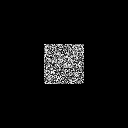

In [ ]:
states = jnp.concatenate([state[None], states])
frames = jax.vmap(ca.render)(states)

mediapy.show_video(frames, width=256, height=256, codec="gif")

## Sampling rules with three channels

### Configuration

In [24]:
num_dims = 2
state_size = 128
channel_size = 3

R = 15
T = 10

num_rules = 15

state_scale = 1

### Define sampling distribution

In [25]:
def sample_kernel_params(key: jax.Array, k: int = 3):
	"""Sample kernel parameters according to a specific distribution."""
	key_r, key_b, key_a, key_w = jax.random.split(key, 4)
	r = jax.random.uniform(key_r, minval=0.2, maxval=1.0)
	b = jax.random.uniform(key_b, shape=(k,), minval=0.001, maxval=1.0)
	a = jax.random.uniform(key_a, shape=(k,), minval=0.0, maxval=1.0)
	w = jax.random.uniform(key_w, shape=(k,), minval=0.01, maxval=0.5)
	return FreeKernelParams(r=r, b=b, a=a, w=w)


def sample_growth_params(key: jax.Array):
	"""Sample growth parameters according to a specific distribution."""
	key_mean, key_std = jax.random.split(key)
	mean = jax.random.uniform(key_mean, minval=0.05, maxval=0.5)
	std = jax.random.uniform(key_std, minval=0.001, maxval=0.18)
	return GrowthParams(mean=mean, std=std)


def sample_rule_params(key: jax.Array, k: int = 3):
	"""Sample rule parameters according to a specific distribution."""
	key_channel_source, key_channel_target, key_weight, key_kernel_params, key_growth_params = (
		jax.random.split(key, 5)
	)

	# Sample channel source and target
	channel_source = jax.random.randint(key_channel_source, (), minval=0, maxval=channel_size)
	channel_target = jax.random.randint(key_channel_target, (), minval=0, maxval=channel_size)

	# Sample weight
	weight = jax.random.uniform(key_weight, minval=0.01, maxval=1.0)

	# Sample kernel and growth parameters
	kernel_params = sample_kernel_params(key_kernel_params, k)
	growth_params = sample_growth_params(key_growth_params)

	return RuleParams(
		channel_source=channel_source,
		channel_target=channel_target,
		weight=weight,
		kernel_params=kernel_params,
		growth_params=growth_params,
	)

### Sample rules

In [26]:
seed = 0

key = jax.random.key(seed)
keys = jax.random.split(key, num_rules)
rule_params = jax.vmap(sample_rule_params)(keys)

### Instantiate Lenia with sampled rules

In [27]:
ca = FlowLenia(
	num_dims=num_dims,
	channel_size=channel_size,
	R=R,
	T=T,
	rule_params=rule_params,
	state_size=state_size,
)

### Init state

In [28]:
def init_state(key):
	pattern = jax.random.uniform(key, (40, 40, channel_size))

	mid = state_size // 2

	# Scale cells
	scaled_cells = pattern.repeat(state_scale, axis=-3).repeat(state_scale, axis=-2)
	cx, cy = scaled_cells.shape[0], scaled_cells.shape[1]

	# Create empty state and place cells
	state = jnp.zeros((state_size, state_size, channel_size))
	state = state.at[mid - cx // 2 : mid + cx - cx // 2, mid - cy // 2 : mid + cy - cy // 2, :].set(
		scaled_cells
	)
	return state

### Visualize

In [201]:
state = init_state(key)

states = ca(state, num_steps=256, all_steps=True)

""

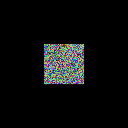

In [203]:
states = jnp.concatenate([state[None], states])
frames = jax.vmap(ca.render)(states)

mediapy.show_video(frames, width=256, height=256, codec="gif")